In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [2]:
emotion_data = pd.read_csv('Emotion_final.csv')

In [3]:
emotion_data.head(5)

,Text,Emotion
0,i didnt feel https humiliated # @,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
emotion_data.count()

Text       21459
Emotion    21459
dtype: int64

In [5]:
emotion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [6]:
emotion_data['Emotion'].value_counts()

Emotion
happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: count, dtype: int64

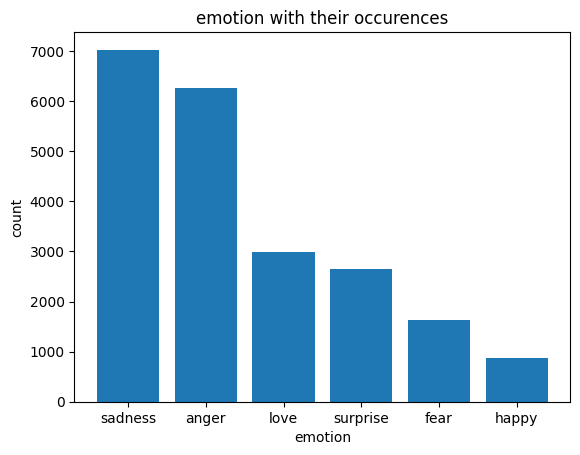

In [7]:
x = emotion_data['Emotion'].unique()
y = emotion_data['Emotion'].value_counts()
plt.bar(x,y)
plt.title('emotion with their occurences')
plt.xlabel('emotion')
plt.ylabel('count')
plt.show()

In [8]:
#data cleaning 

#urls
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Download tokenization resources (only needed once)

def remove_urls_and_special_characters(text):
    # Remove http and https URLs
    words = word_tokenize(text)
    cleaned_words = []

    for word in words:
        if word.startswith(('http://', 'https://', 'http', 'https')):
            continue  # Skip URLs
        else:
            # Remove special characters from the word
            cleaned_word = ''.join(char for char in word if char.isalnum() or char.isspace())
            if cleaned_word:
                cleaned_words.append(cleaned_word)

    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
emotion_data['cleaned_text'] = emotion_data['Text'].apply(remove_urls_and_special_characters)

In [10]:
emotion_data.head()

,Text,Emotion,cleaned_text
0,i didnt feel https humiliated # @,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy


In [11]:
import string

def remove_punctuations(text):
    # Remove punctuations using the string module
    cleaned_text = ''.join(char for char in text if char not in string.punctuation)
    
    return cleaned_text
emotion_data['cleaned_text'] = emotion_data['cleaned_text'].apply(remove_punctuations)

In [12]:
def lower_text(text):
    cleaned_text = text.lower()
    return cleaned_text
emotion_data['cleaned_text'] = emotion_data['cleaned_text'].apply(lower_text)


In [13]:
emotion_data.head()

,Text,Emotion,cleaned_text
0,i didnt feel https humiliated # @,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy


In [17]:
emotion_data['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [16]:
X = emotion_data['cleaned_text']
y = emotion_data['Emotion']

In [17]:
from nltk.tokenize import word_tokenize

In [18]:
X_tokenized = X.apply(lambda cleaned_text: word_tokenize(cleaned_text))

In [20]:
X_tokenized.head(5)

0                         [i, didnt, feel, humiliated]
1    [i, can, go, from, feeling, so, hopeless, to, ...
2    [im, grabbing, a, minute, to, post, i, feel, g...
3    [i, am, ever, feeling, nostalgic, about, the, ...
4                            [i, am, feeling, grouchy]
Name: cleaned_text, dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.13, random_state = 42)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report




In [31]:
model = LogisticRegression(solver='saga', C=1.0)


In [32]:
model.fit(X_train, y_train)

LogisticRegression(solver='saga')

In [34]:
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.80      0.85       405
           1       0.87      0.78      0.83       355
           2       0.81      0.95      0.88       878
           3       0.89      0.60      0.72       199
           4       0.89      0.94      0.91       850
           5       0.85      0.50      0.63       103

    accuracy                           0.86      2790
   macro avg       0.87      0.76      0.80      2790
weighted avg       0.87      0.86      0.86      2790



In [35]:
print(X_test[9])

  (0, 17453)	0.2021574696321896
  (0, 17397)	0.16273601336227636
  (0, 17363)	0.22804391812891572
  (0, 17251)	0.14161180097046025
  (0, 16652)	0.32143533871832386
  (0, 15934)	0.23840789665356008
  (0, 15893)	0.19746852508650767
  (0, 15861)	0.22044039169581606
  (0, 14683)	0.286190727113773
  (0, 11527)	0.19852972607045513
  (0, 10971)	0.20037774998036664
  (0, 10966)	0.15812349694942696
  (0, 10899)	0.2175464950321116
  (0, 9355)	0.27202353859911826
  (0, 9152)	0.13155058996837402
  (0, 9120)	0.2064917326485341
  (0, 6736)	0.3275991758138216
  (0, 5857)	0.0684278658326381
  (0, 5801)	0.32339989944796665
  (0, 623)	0.16885614647723685
